# ClickHouse для аналитика

## MergeTree Family

### Описание задачи

Создайте таблицу аналогичную предыдущей с движком **AggregatingMergeTree** и ключом сортировки product_category 

Укажите поля агрегации

    sale_amount как SUM
    customer_id как any
    
Поля таблицы:

    sale_date: дата продажи
    product_id: идентификатор продукта
    product_category: категория продукта
    sale_amount: сумма продажи 
    sale_quantity: количество продаж
    customer_id: идентификатор покупателя 
    store_id: идентификатор магазина
    PARTITION BY: по месяцам по полю sale_date
    ORDER BY: product_category
    
После чего сгенерируйте данные и вставьте в таблицу, [код для генерации данных](https://colab.research.google.com/drive/1NDLy9qPijY0N4FQu_sKn69fCkmSwq27w?usp=sharing). Вставка данных аналогично предыдущей задаче:

    INSERT INTO <your_table_name>
    FORMAT JSONEachRow
    [{json_data}]
    
В качестве ответа укажите max(sale_amount) в полученной таблице и умножьте это на количество строк в таблице.

### Создание таблицы

    CREATE TABLE my_table_aggregating(
        sale_date Date,
        product_id UInt32,
        product_category String,
        sale_amount SimpleAggregateFunction(sum, Float64),
        sale_quantity  UInt32,
        customer_id SimpleAggregateFunction(any, UInt32),
        store_id UInt32
    )
      ENGINE = AggregatingMergeTree()
      PARTITION BY toYYYYMM(sale_date)
      ORDER BY (product_category)

### Генерация данных

Скрипт генерации случайных данных (получен по ссылке из задания):

In [1]:
# Функция генерации даты
from random import randrange, sample
from datetime import timedelta, datetime

import random

random.seed(23)

def random_date(start, end):
    """
    This function will return a random datetime between two datetime
    objects.
    """
    delta = end - start
    int_delta = (delta.days * 24 * 60 * 60) + delta.seconds
    random_second = randrange(int_delta)
    return (start + timedelta(seconds=random_second)).date()


d1 = datetime.strptime('1/1/2020', '%m/%d/%Y')
d2 = datetime.strptime('1/30/2020', '%m/%d/%Y')

# Код генерации данных
import json
import random
import string
import datetime

data = []
for i in range(100):
    item = {
        "sale_date": str(random_date(d1, d2)),
        "product_id": int(random.uniform(0, 1) * 100),
        "product_category": sample(['pr1', 'pr2', 'pr3'], 1)[0],
        "sale_amount": int(random.uniform(0, 1) * 100),
        "sale_quantity": int(random.uniform(0, 1) * 100),
        "customer_id": int(random.uniform(0, 1) * 100),
        "store_id": int(random.uniform(0, 1) * 100),
    }
    data.append(item)

json_text = json.dumps(data)
print(json_text)

[{"sale_date": "2020-01-15", "product_id": 89, "product_category": "pr1", "sale_amount": 1, "sale_quantity": 30, "customer_id": 37, "store_id": 35}, {"sale_date": "2020-01-10", "product_id": 26, "product_category": "pr1", "sale_amount": 22, "sale_quantity": 45, "customer_id": 2, "store_id": 8}, {"sale_date": "2020-01-25", "product_id": 42, "product_category": "pr3", "sale_amount": 62, "sale_quantity": 43, "customer_id": 77, "store_id": 20}, {"sale_date": "2020-01-02", "product_id": 58, "product_category": "pr3", "sale_amount": 17, "sale_quantity": 21, "customer_id": 73, "store_id": 56}, {"sale_date": "2020-01-18", "product_id": 96, "product_category": "pr2", "sale_amount": 66, "sale_quantity": 31, "customer_id": 8, "store_id": 47}, {"sale_date": "2020-01-24", "product_id": 59, "product_category": "pr2", "sale_amount": 67, "sale_quantity": 16, "customer_id": 79, "store_id": 53}, {"sale_date": "2020-01-26", "product_id": 19, "product_category": "pr1", "sale_amount": 8, "sale_quantity": 4

### Вставка данных в таблицу

INSERT INTO my_table_aggregating
FORMAT JSONEachRow
[{"sale_date": "2020-01-15", "product_id": 89, "product_category": "pr1", "sale_amount": 1, "sale_quantity": 30, "customer_id": 37, "store_id": 35}, {"sale_date": "2020-01-10", "product_id": 26, "product_category": "pr1", "sale_amount": 22, "sale_quantity": 45, "customer_id": 2, "store_id": 8}, {"sale_date": "2020-01-25", "product_id": 42, "product_category": "pr3", "sale_amount": 62, "sale_quantity": 43, "customer_id": 77, "store_id": 20}, {"sale_date": "2020-01-02", "product_id": 58, "product_category": "pr3", "sale_amount": 17, "sale_quantity": 21, "customer_id": 73, "store_id": 56}, {"sale_date": "2020-01-18", "product_id": 96, "product_category": "pr2", "sale_amount": 66, "sale_quantity": 31, "customer_id": 8, "store_id": 47}, {"sale_date": "2020-01-24", "product_id": 59, "product_category": "pr2", "sale_amount": 67, "sale_quantity": 16, "customer_id": 79, "store_id": 53}, {"sale_date": "2020-01-26", "product_id": 19, "product_category": "pr1", "sale_amount": 8, "sale_quantity": 42, "customer_id": 56, "store_id": 94}, {"sale_date": "2020-01-14", "product_id": 82, "product_category": "pr2", "sale_amount": 10, "sale_quantity": 90, "customer_id": 54, "store_id": 89}, {"sale_date": "2020-01-23", "product_id": 54, "product_category": "pr2", "sale_amount": 14, "sale_quantity": 61, "customer_id": 11, "store_id": 79}, {"sale_date": "2020-01-24", "product_id": 23, "product_category": "pr3", "sale_amount": 14, "sale_quantity": 74, "customer_id": 10, "store_id": 38}, {"sale_date": "2020-01-22", "product_id": 97, "product_category": "pr1", "sale_amount": 63, "sale_quantity": 39, "customer_id": 16, "store_id": 22}, {"sale_date": "2020-01-01", "product_id": 97, "product_category": "pr3", "sale_amount": 94, "sale_quantity": 53, "customer_id": 98, "store_id": 74}, {"sale_date": "2020-01-17", "product_id": 1, "product_category": "pr2", "sale_amount": 49, "sale_quantity": 3, "customer_id": 26, "store_id": 54}, {"sale_date": "2020-01-23", "product_id": 95, "product_category": "pr1", "sale_amount": 9, "sale_quantity": 55, "customer_id": 64, "store_id": 69}, {"sale_date": "2020-01-28", "product_id": 81, "product_category": "pr2", "sale_amount": 10, "sale_quantity": 16, "customer_id": 1, "store_id": 76}, {"sale_date": "2020-01-21", "product_id": 81, "product_category": "pr3", "sale_amount": 68, "sale_quantity": 41, "customer_id": 69, "store_id": 82}, {"sale_date": "2020-01-12", "product_id": 54, "product_category": "pr2", "sale_amount": 40, "sale_quantity": 77, "customer_id": 55, "store_id": 54}, {"sale_date": "2020-01-14", "product_id": 10, "product_category": "pr3", "sale_amount": 13, "sale_quantity": 96, "customer_id": 72, "store_id": 43}, {"sale_date": "2020-01-09", "product_id": 95, "product_category": "pr1", "sale_amount": 33, "sale_quantity": 68, "customer_id": 11, "store_id": 88}, {"sale_date": "2020-01-23", "product_id": 79, "product_category": "pr3", "sale_amount": 27, "sale_quantity": 33, "customer_id": 2, "store_id": 95}, {"sale_date": "2020-01-20", "product_id": 20, "product_category": "pr3", "sale_amount": 3, "sale_quantity": 65, "customer_id": 74, "store_id": 95}, {"sale_date": "2020-01-21", "product_id": 69, "product_category": "pr2", "sale_amount": 59, "sale_quantity": 99, "customer_id": 72, "store_id": 17}, {"sale_date": "2020-01-26", "product_id": 29, "product_category": "pr1", "sale_amount": 22, "sale_quantity": 6, "customer_id": 89, "store_id": 37}, {"sale_date": "2020-01-01", "product_id": 67, "product_category": "pr3", "sale_amount": 41, "sale_quantity": 68, "customer_id": 40, "store_id": 80}, {"sale_date": "2020-01-14", "product_id": 95, "product_category": "pr2", "sale_amount": 16, "sale_quantity": 4, "customer_id": 88, "store_id": 66}, {"sale_date": "2020-01-27", "product_id": 88, "product_category": "pr3", "sale_amount": 27, "sale_quantity": 8, "customer_id": 21, "store_id": 26}, {"sale_date": "2020-01-08", "product_id": 50, "product_category": "pr1", "sale_amount": 62, "sale_quantity": 98, "customer_id": 27, "store_id": 76}, {"sale_date": "2020-01-01", "product_id": 85, "product_category": "pr2", "sale_amount": 78, "sale_quantity": 11, "customer_id": 76, "store_id": 56}, {"sale_date": "2020-01-23", "product_id": 4, "product_category": "pr1", "sale_amount": 27, "sale_quantity": 36, "customer_id": 14, "store_id": 83}, {"sale_date": "2020-01-05", "product_id": 18, "product_category": "pr3", "sale_amount": 39, "sale_quantity": 67, "customer_id": 29, "store_id": 7}, {"sale_date": "2020-01-09", "product_id": 4, "product_category": "pr1", "sale_amount": 91, "sale_quantity": 18, "customer_id": 1, "store_id": 61}, {"sale_date": "2020-01-07", "product_id": 93, "product_category": "pr2", "sale_amount": 46, "sale_quantity": 70, "customer_id": 56, "store_id": 77}, {"sale_date": "2020-01-03", "product_id": 60, "product_category": "pr3", "sale_amount": 10, "sale_quantity": 2, "customer_id": 35, "store_id": 16}, {"sale_date": "2020-01-11", "product_id": 20, "product_category": "pr2", "sale_amount": 99, "sale_quantity": 75, "customer_id": 22, "store_id": 58}, {"sale_date": "2020-01-22", "product_id": 66, "product_category": "pr3", "sale_amount": 65, "sale_quantity": 74, "customer_id": 92, "store_id": 31}, {"sale_date": "2020-01-07", "product_id": 35, "product_category": "pr2", "sale_amount": 83, "sale_quantity": 3, "customer_id": 39, "store_id": 72}, {"sale_date": "2020-01-26", "product_id": 16, "product_category": "pr2", "sale_amount": 40, "sale_quantity": 5, "customer_id": 31, "store_id": 42}, {"sale_date": "2020-01-08", "product_id": 58, "product_category": "pr2", "sale_amount": 36, "sale_quantity": 95, "customer_id": 3, "store_id": 29}, {"sale_date": "2020-01-09", "product_id": 39, "product_category": "pr2", "sale_amount": 57, "sale_quantity": 96, "customer_id": 53, "store_id": 62}, {"sale_date": "2020-01-21", "product_id": 81, "product_category": "pr1", "sale_amount": 91, "sale_quantity": 98, "customer_id": 66, "store_id": 43}, {"sale_date": "2020-01-04", "product_id": 45, "product_category": "pr1", "sale_amount": 39, "sale_quantity": 38, "customer_id": 5, "store_id": 3}, {"sale_date": "2020-01-19", "product_id": 35, "product_category": "pr3", "sale_amount": 67, "sale_quantity": 98, "customer_id": 87, "store_id": 71}, {"sale_date": "2020-01-07", "product_id": 60, "product_category": "pr1", "sale_amount": 75, "sale_quantity": 81, "customer_id": 46, "store_id": 75}, {"sale_date": "2020-01-04", "product_id": 42, "product_category": "pr3", "sale_amount": 14, "sale_quantity": 64, "customer_id": 30, "store_id": 62}, {"sale_date": "2020-01-26", "product_id": 60, "product_category": "pr3", "sale_amount": 64, "sale_quantity": 85, "customer_id": 78, "store_id": 31}, {"sale_date": "2020-01-14", "product_id": 43, "product_category": "pr3", "sale_amount": 93, "sale_quantity": 54, "customer_id": 33, "store_id": 73}, {"sale_date": "2020-01-11", "product_id": 79, "product_category": "pr3", "sale_amount": 78, "sale_quantity": 56, "customer_id": 6, "store_id": 78}, {"sale_date": "2020-01-07", "product_id": 66, "product_category": "pr1", "sale_amount": 69, "sale_quantity": 31, "customer_id": 25, "store_id": 95}, {"sale_date": "2020-01-29", "product_id": 7, "product_category": "pr1", "sale_amount": 96, "sale_quantity": 3, "customer_id": 47, "store_id": 93}, {"sale_date": "2020-01-02", "product_id": 51, "product_category": "pr2", "sale_amount": 54, "sale_quantity": 42, "customer_id": 63, "store_id": 0}, {"sale_date": "2020-01-10", "product_id": 92, "product_category": "pr3", "sale_amount": 73, "sale_quantity": 7, "customer_id": 82, "store_id": 17}, {"sale_date": "2020-01-11", "product_id": 48, "product_category": "pr3", "sale_amount": 66, "sale_quantity": 14, "customer_id": 97, "store_id": 0}, {"sale_date": "2020-01-19", "product_id": 75, "product_category": "pr3", "sale_amount": 75, "sale_quantity": 42, "customer_id": 4, "store_id": 1}, {"sale_date": "2020-01-08", "product_id": 79, "product_category": "pr2", "sale_amount": 64, "sale_quantity": 94, "customer_id": 55, "store_id": 97}, {"sale_date": "2020-01-01", "product_id": 85, "product_category": "pr1", "sale_amount": 45, "sale_quantity": 28, "customer_id": 71, "store_id": 3}, {"sale_date": "2020-01-09", "product_id": 20, "product_category": "pr1", "sale_amount": 14, "sale_quantity": 13, "customer_id": 58, "store_id": 97}, {"sale_date": "2020-01-21", "product_id": 75, "product_category": "pr1", "sale_amount": 80, "sale_quantity": 52, "customer_id": 53, "store_id": 59}, {"sale_date": "2020-01-11", "product_id": 83, "product_category": "pr2", "sale_amount": 65, "sale_quantity": 9, "customer_id": 58, "store_id": 80}, {"sale_date": "2020-01-07", "product_id": 11, "product_category": "pr2", "sale_amount": 35, "sale_quantity": 20, "customer_id": 50, "store_id": 98}, {"sale_date": "2020-01-05", "product_id": 71, "product_category": "pr1", "sale_amount": 36, "sale_quantity": 88, "customer_id": 45, "store_id": 15}, {"sale_date": "2020-01-27", "product_id": 79, "product_category": "pr2", "sale_amount": 3, "sale_quantity": 59, "customer_id": 99, "store_id": 77}, {"sale_date": "2020-01-08", "product_id": 7, "product_category": "pr2", "sale_amount": 63, "sale_quantity": 75, "customer_id": 44, "store_id": 5}, {"sale_date": "2020-01-13", "product_id": 34, "product_category": "pr1", "sale_amount": 46, "sale_quantity": 77, "customer_id": 33, "store_id": 9}, {"sale_date": "2020-01-21", "product_id": 91, "product_category": "pr1", "sale_amount": 40, "sale_quantity": 66, "customer_id": 37, "store_id": 73}, {"sale_date": "2020-01-09", "product_id": 56, "product_category": "pr3", "sale_amount": 94, "sale_quantity": 2, "customer_id": 85, "store_id": 77}, {"sale_date": "2020-01-08", "product_id": 10, "product_category": "pr3", "sale_amount": 66, "sale_quantity": 65, "customer_id": 84, "store_id": 33}, {"sale_date": "2020-01-20", "product_id": 63, "product_category": "pr3", "sale_amount": 14, "sale_quantity": 29, "customer_id": 52, "store_id": 52}, {"sale_date": "2020-01-29", "product_id": 63, "product_category": "pr3", "sale_amount": 56, "sale_quantity": 63, "customer_id": 51, "store_id": 67}, {"sale_date": "2020-01-09", "product_id": 60, "product_category": "pr2", "sale_amount": 72, "sale_quantity": 72, "customer_id": 81, "store_id": 89}, {"sale_date": "2020-01-15", "product_id": 54, "product_category": "pr2", "sale_amount": 47, "sale_quantity": 71, "customer_id": 5, "store_id": 41}, {"sale_date": "2020-01-04", "product_id": 27, "product_category": "pr1", "sale_amount": 1, "sale_quantity": 61, "customer_id": 90, "store_id": 36}, {"sale_date": "2020-01-12", "product_id": 60, "product_category": "pr3", "sale_amount": 52, "sale_quantity": 26, "customer_id": 94, "store_id": 20}, {"sale_date": "2020-01-11", "product_id": 68, "product_category": "pr3", "sale_amount": 98, "sale_quantity": 14, "customer_id": 73, "store_id": 74}, {"sale_date": "2020-01-20", "product_id": 33, "product_category": "pr3", "sale_amount": 22, "sale_quantity": 42, "customer_id": 74, "store_id": 74}, {"sale_date": "2020-01-16", "product_id": 59, "product_category": "pr3", "sale_amount": 11, "sale_quantity": 6, "customer_id": 11, "store_id": 11}, {"sale_date": "2020-01-22", "product_id": 28, "product_category": "pr1", "sale_amount": 35, "sale_quantity": 10, "customer_id": 66, "store_id": 33}, {"sale_date": "2020-01-28", "product_id": 86, "product_category": "pr2", "sale_amount": 91, "sale_quantity": 99, "customer_id": 20, "store_id": 56}, {"sale_date": "2020-01-20", "product_id": 90, "product_category": "pr3", "sale_amount": 59, "sale_quantity": 99, "customer_id": 3, "store_id": 65}, {"sale_date": "2020-01-08", "product_id": 73, "product_category": "pr1", "sale_amount": 82, "sale_quantity": 54, "customer_id": 64, "store_id": 4}, {"sale_date": "2020-01-24", "product_id": 1, "product_category": "pr2", "sale_amount": 91, "sale_quantity": 84, "customer_id": 43, "store_id": 22}, {"sale_date": "2020-01-07", "product_id": 65, "product_category": "pr1", "sale_amount": 70, "sale_quantity": 28, "customer_id": 79, "store_id": 19}, {"sale_date": "2020-01-15", "product_id": 98, "product_category": "pr3", "sale_amount": 88, "sale_quantity": 0, "customer_id": 26, "store_id": 48}, {"sale_date": "2020-01-24", "product_id": 17, "product_category": "pr3", "sale_amount": 99, "sale_quantity": 42, "customer_id": 20, "store_id": 70}, {"sale_date": "2020-01-19", "product_id": 97, "product_category": "pr2", "sale_amount": 12, "sale_quantity": 73, "customer_id": 27, "store_id": 26}, {"sale_date": "2020-01-11", "product_id": 21, "product_category": "pr1", "sale_amount": 63, "sale_quantity": 29, "customer_id": 20, "store_id": 8}, {"sale_date": "2020-01-09", "product_id": 41, "product_category": "pr1", "sale_amount": 91, "sale_quantity": 4, "customer_id": 54, "store_id": 21}, {"sale_date": "2020-01-01", "product_id": 0, "product_category": "pr2", "sale_amount": 3, "sale_quantity": 57, "customer_id": 51, "store_id": 69}, {"sale_date": "2020-01-28", "product_id": 48, "product_category": "pr3", "sale_amount": 76, "sale_quantity": 88, "customer_id": 22, "store_id": 6}, {"sale_date": "2020-01-07", "product_id": 0, "product_category": "pr1", "sale_amount": 19, "sale_quantity": 8, "customer_id": 24, "store_id": 13}, {"sale_date": "2020-01-05", "product_id": 69, "product_category": "pr2", "sale_amount": 52, "sale_quantity": 49, "customer_id": 50, "store_id": 81}, {"sale_date": "2020-01-03", "product_id": 87, "product_category": "pr3", "sale_amount": 66, "sale_quantity": 0, "customer_id": 50, "store_id": 62}, {"sale_date": "2020-01-01", "product_id": 57, "product_category": "pr1", "sale_amount": 31, "sale_quantity": 58, "customer_id": 3, "store_id": 75}, {"sale_date": "2020-01-26", "product_id": 54, "product_category": "pr3", "sale_amount": 92, "sale_quantity": 50, "customer_id": 93, "store_id": 17}, {"sale_date": "2020-01-18", "product_id": 8, "product_category": "pr2", "sale_amount": 84, "sale_quantity": 70, "customer_id": 31, "store_id": 97}, {"sale_date": "2020-01-16", "product_id": 29, "product_category": "pr1", "sale_amount": 42, "sale_quantity": 65, "customer_id": 3, "store_id": 7}, {"sale_date": "2020-01-16", "product_id": 39, "product_category": "pr3", "sale_amount": 37, "sale_quantity": 40, "customer_id": 93, "store_id": 57}, {"sale_date": "2020-01-25", "product_id": 15, "product_category": "pr1", "sale_amount": 42, "sale_quantity": 11, "customer_id": 9, "store_id": 56}, {"sale_date": "2020-01-03", "product_id": 48, "product_category": "pr1", "sale_amount": 38, "sale_quantity": 9, "customer_id": 80, "store_id": 90}, {"sale_date": "2020-01-02", "product_id": 34, "product_category": "pr1", "sale_amount": 53, "sale_quantity": 38, "customer_id": 70, "store_id": 97}, {"sale_date": "2020-01-26", "product_id": 25, "product_category": "pr1", "sale_amount": 20, "sale_quantity": 15, "customer_id": 13, "store_id": 54}]

### Расчёт искомого значения

Найти max(sale_amount) в полученной таблице и умножить это на количество строк в таблице.


    SELECT MAX(sale_amount) * COUNT(*)
    FROM my_table_aggregating

    5820

### Описание созданной таблицы

    DESCRIBE TABLE my_table_aggregating

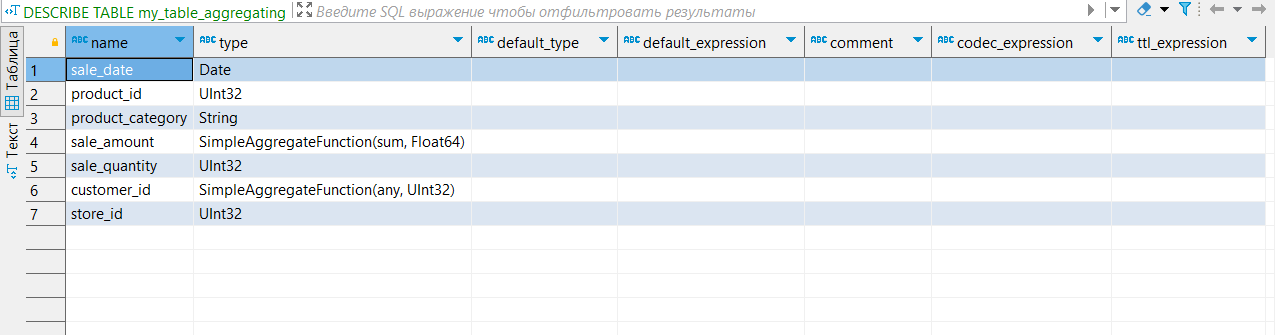

___________________________________________________________________________________________________________________________
Заметки вела: аналитик данных Малахова Наталья

Мой телеграм-канал: [Дневник аналитика](https://t.me/diary_musician_analyst "Дневник аналитика")

Портфолио: [GitHub](https://github.com/Malakhova-Natalya "GitHub")

Хабр: [Habr](https://habr.com/ru/users/Malakhova-Natalya/publications/articles/ "Habr")


Спасибо за внимание!